In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Reading Dataset

In [3]:
prop_16 = pd.read_csv('properties_2016.csv')
train_16 = pd.read_csv('train_2016_v2.csv')

C:\Users\hskim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prop_16.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


### Shape Of Dataset

In [6]:
print('shape of prop_16:{}'.format(prop_16.shape))
print('shape of train_16:{}'.format(train_16.shape))

shape of prop_16:(2985217, 58)
shape of train_16:(90275, 3)


- prop 파일에는 2985217개의 data와 58개의 컬럼이 있다.
- train 파일에는 90275개의 data와 3개의 컬럼이 있다.

### Merge train and prop to facilitate EDA

In [7]:
merged = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [8]:
print(len(merged))
merged.head()

90275


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [9]:
onlydatamerged = merged.drop(['parcelid','transactiondate'],axis=1)
onlydatamerged.tail()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,-0.0356,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,0.0070,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,-0.2679,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,0.0602,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,0.4207,NaN,NaN,NaN,1.0,3.0,NaN,7.0,1.0,NaN,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [10]:
data_typeDF = onlydatamerged.dtypes.value_counts().reset_index().rename(columns={"index":"variableType",0:"count"})
data_typeDF

,variableType,count
0,float64,53
1,object,5


<IPython.core.display.Javascript object>


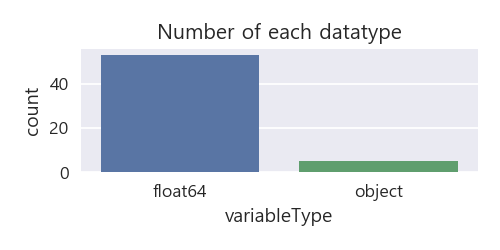

In [11]:
plt.figure(figsize=(4,2))
sns.barplot(data_typeDF['variableType'],data_typeDF['count'])
plt.title('Number of each datatype')
plt.tight_layout()
plt.show()

onlydatamerged DataFrame의 dtype은 float64, object 이렇게 2가지가 있으며, 각각의 갯수는 위와 같다.

### Missing Value Analysis

In [12]:
NomissingValueCol = onlydatamerged.columns[onlydatamerged.notnull().all()]
NomissingValueCol

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcounty', 'roomcnt', 'assessmentyear'],
      dtype='object')

In [13]:
print('there are no missing value in {} columns in onlydatamerged DF'.format(len(NomissingValueCol)))

there are no missing value in 11 columns in onlydatamerged DF


In [14]:
missingValueCol = onlydatamerged.columns[onlydatamerged.isna().any()]
missingValueCol

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertyzoningdesc', 'regionidcity', 'regionidneighborhood',
       'regionidzip', 'storytypeid', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'fireplaceflag',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount',

In [15]:
print('there are missing value in {} columns in onlydatamerged DF'.format(len(missingValueCol)))

there are missing value in 47 columns in onlydatamerged DF


In [16]:
missingValueCount = onlydatamerged.isna().sum()
missingValueCount.sort_values(inplace=True)
missingValueCount

logerror                            0
longitude                           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcounty                      0
latitude                            0
roomcnt                             0
bedroomcnt                          0
bathroomcnt                         0
assessmentyear                      0
fips                                0
landtaxvaluedollarcnt               1
propertycountylandusecode           1
taxvaluedollarcnt                   1
taxamount                           6
regionidzip                        35
structuretaxvaluedollarcnt        380
censustractandblock               605
calculatedfinishedsquarefeet      661
yearbuilt                         756
fullbathcnt                      1182
calculatedbathnbr                1182
regionidcity                     1803
finishedsquarefeet12             4679
lotsizesquarefeet               10150
unitcnt                         31922
propertyzoni

In [93]:
missingNum = missingValueCount[missingValueCount >0]
missinglessHalf = missingValueCount[missingValueCount <= 90275/2]
missingNumHalf = missingValueCount[missingValueCount > 90275/2]
missingNum90 = missingValueCount[missingValueCount > 90275*(9/10)]
#90275 : length of merged object

In [19]:
missingNum.head()

landtaxvaluedollarcnt         1
propertycountylandusecode     1
taxvaluedollarcnt             1
taxamount                     6
regionidzip                  35
dtype: int64

In [98]:
missinglessHalf.head()

logerror                  0
longitude                 0
propertylandusetypeid     0
rawcensustractandblock    0
regionidcounty            0
dtype: int64

In [20]:
missingNumHalf.head()

regionidneighborhood     54263
garagecarcnt             60338
garagetotalsqft          60338
airconditioningtypeid    61494
numberofstories          69705
dtype: int64

In [27]:
print(len(missingNum90))
missingNum90

20


finishedfloor1squarefeet    83419
finishedsquarefeet50        83419
finishedsquarefeet15        86711
yardbuildingsqft17          87629
hashottuborspa              87910
taxdelinquencyflag          88492
taxdelinquencyyear          88492
pooltypeid2                 89071
pooltypeid10                89114
poolsizesum                 89306
decktypeid                  89617
finishedsquarefeet6         89854
typeconstructiontypeid      89976
architecturalstyletypeid    90014
fireplaceflag               90053
yardbuildingsqft26          90180
basementsqft                90232
storytypeid                 90232
finishedsquarefeet13        90242
buildingclasstypeid         90259
dtype: int64

In [21]:
print('there are missing value over half in columns:{}'.format(len(missingNumHalf)))
print('there are missing value in columns:{}'.format(len(missingNum)))

there are missing value over half in columns:29
there are missing value in columns:47


Missing value가 한 개라도 있는 컬럼와 그 갯수에 대한 Histogram

<IPython.core.display.Javascript object>


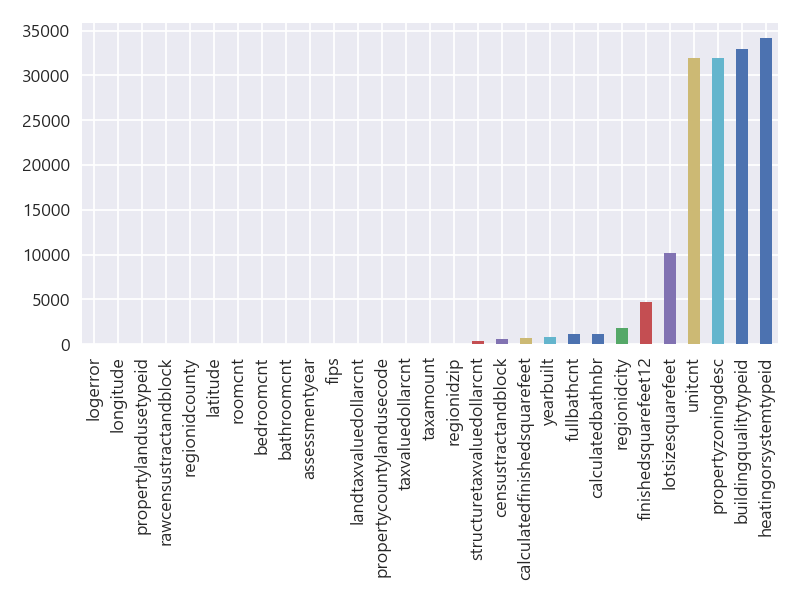

In [99]:
missinglessHalf.plot.bar()
plt.tight_layout()

<IPython.core.display.Javascript object>


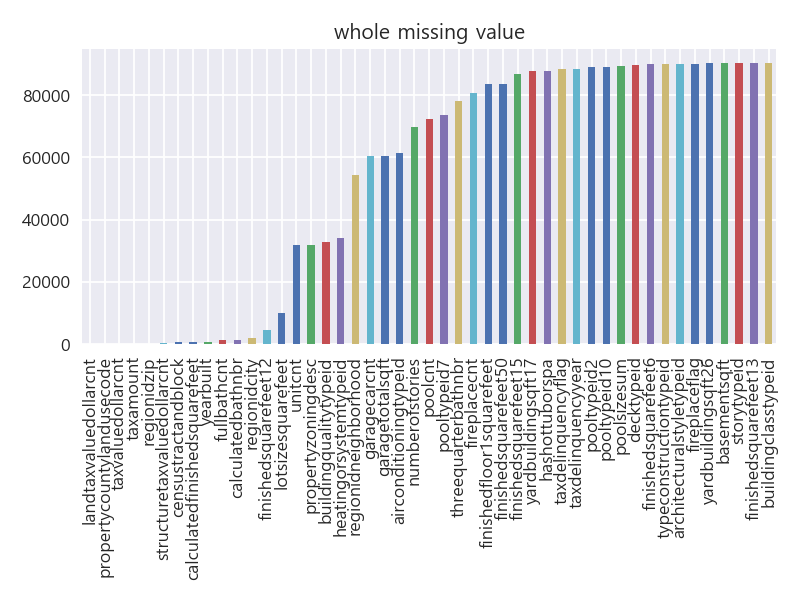

In [112]:
missingNum.plot.bar()
plt.title('whole missing value')
plt.tight_layout()

Missing value가 그 해당 컬럼의 절반 이상의 비중을 차지하고 있는 컬럼에 대한 Histogram

<IPython.core.display.Javascript object>


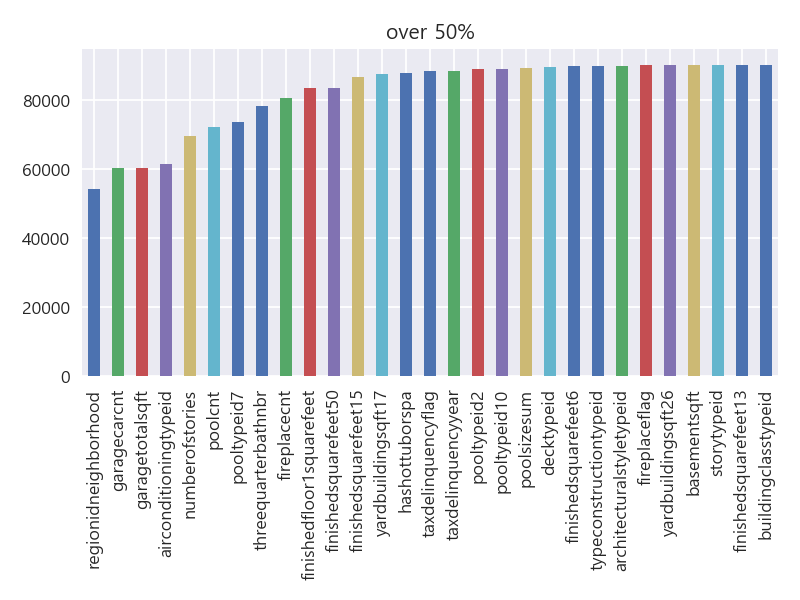

In [111]:
missingNumHalf.plot.bar()
plt.title('over 50%')
plt.tight_layout()

<IPython.core.display.Javascript object>


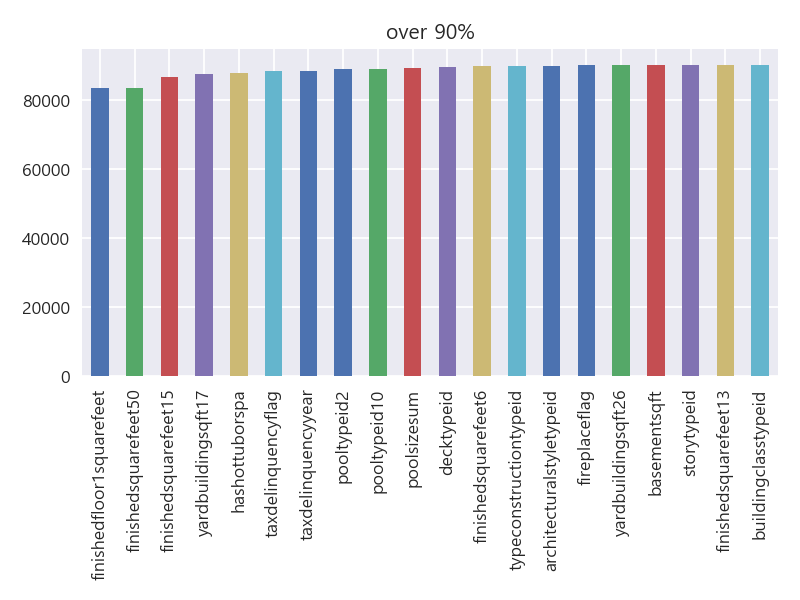

In [113]:
missingNum90.plot.bar()
plt.title('over 90%')
plt.tight_layout()

### Numerical data distribution

In [32]:
merged_num = onlydatamerged.select_dtypes(include=['float64','int64'])
merged_num.head()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,6.059042e+13


Quantitative data 에 대한 distribution

<IPython.core.display.Javascript object>


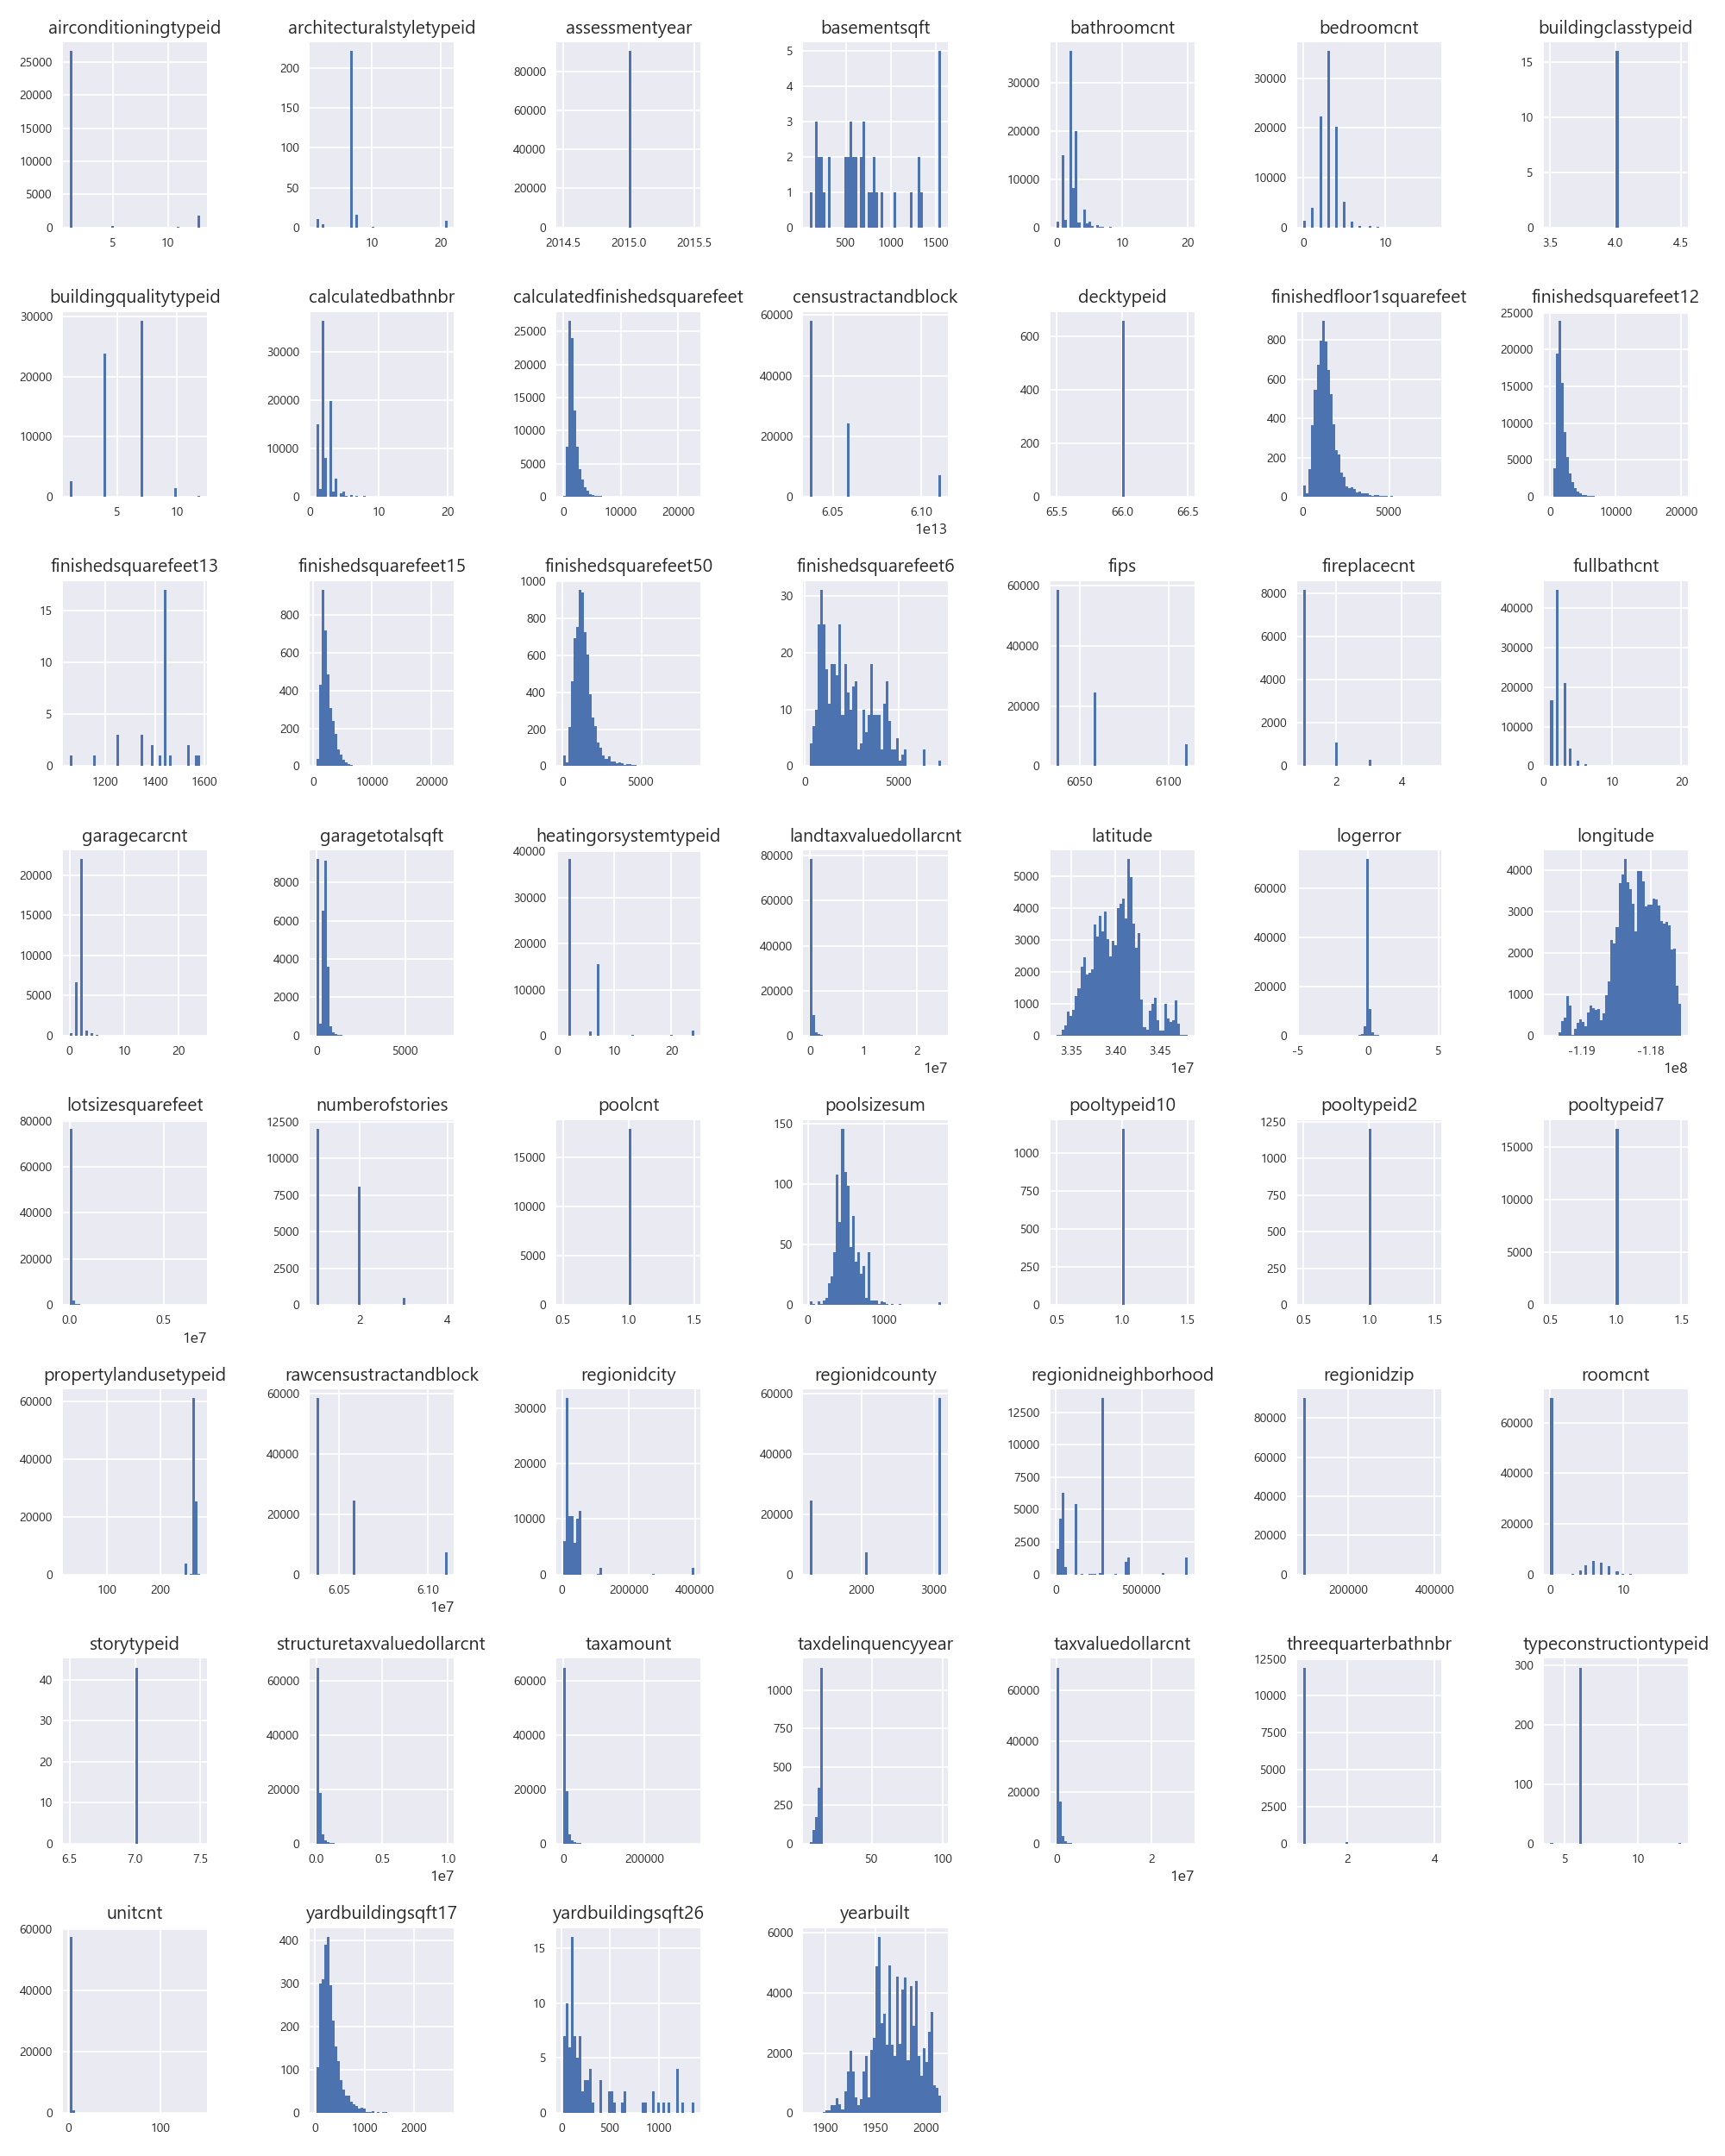

In [147]:
merged_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.tight_layout()

In [102]:
missinglessHalfCol = list(missinglessHalf.index)

In [104]:
quantitative = merged_num.loc[:,missinglessHalfCol].head()
quantitative

C:\Users\hskim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\hskim\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,logerror,longitude,propertylandusetypeid,rawcensustractandblock,regionidcounty,latitude,roomcnt,bedroomcnt,bathroomcnt,assessmentyear,...,yearbuilt,fullbathcnt,calculatedbathnbr,regionidcity,finishedsquarefeet12,lotsizesquarefeet,unitcnt,propertyzoningdesc,buildingqualitytypeid,heatingorsystemtypeid
0,0.0276,-118488536.0,261.0,6.037107e+07,3101.0,34280990.0,0.0,3.0,2.0,2015.0,...,1959.0,2.0,2.0,12447.0,1684.0,7528.0,1.0,NaN,4.0,2.0
1,-0.1684,-117677556.0,261.0,6.059052e+07,1286.0,33668120.0,0.0,4.0,3.5,2015.0,...,2014.0,3.0,3.5,32380.0,2263.0,3643.0,NaN,NaN,NaN,NaN
2,-0.0040,-118175032.0,261.0,6.037464e+07,3101.0,34136312.0,0.0,2.0,3.0,2015.0,...,1940.0,3.0,3.0,47019.0,2217.0,11423.0,1.0,NaN,4.0,2.0
3,0.0218,-118309000.0,266.0,6.037296e+07,3101.0,33755800.0,0.0,2.0,2.0,2015.0,...,1987.0,2.0,2.0,12447.0,839.0,70859.0,1.0,NaN,4.0,2.0
4,-0.0050,-117700234.0,261.0,6.059042e+07,1286.0,33485643.0,8.0,4.0,2.5,2015.0,...,1981.0,2.0,2.5,17686.0,2283.0,6000.0,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


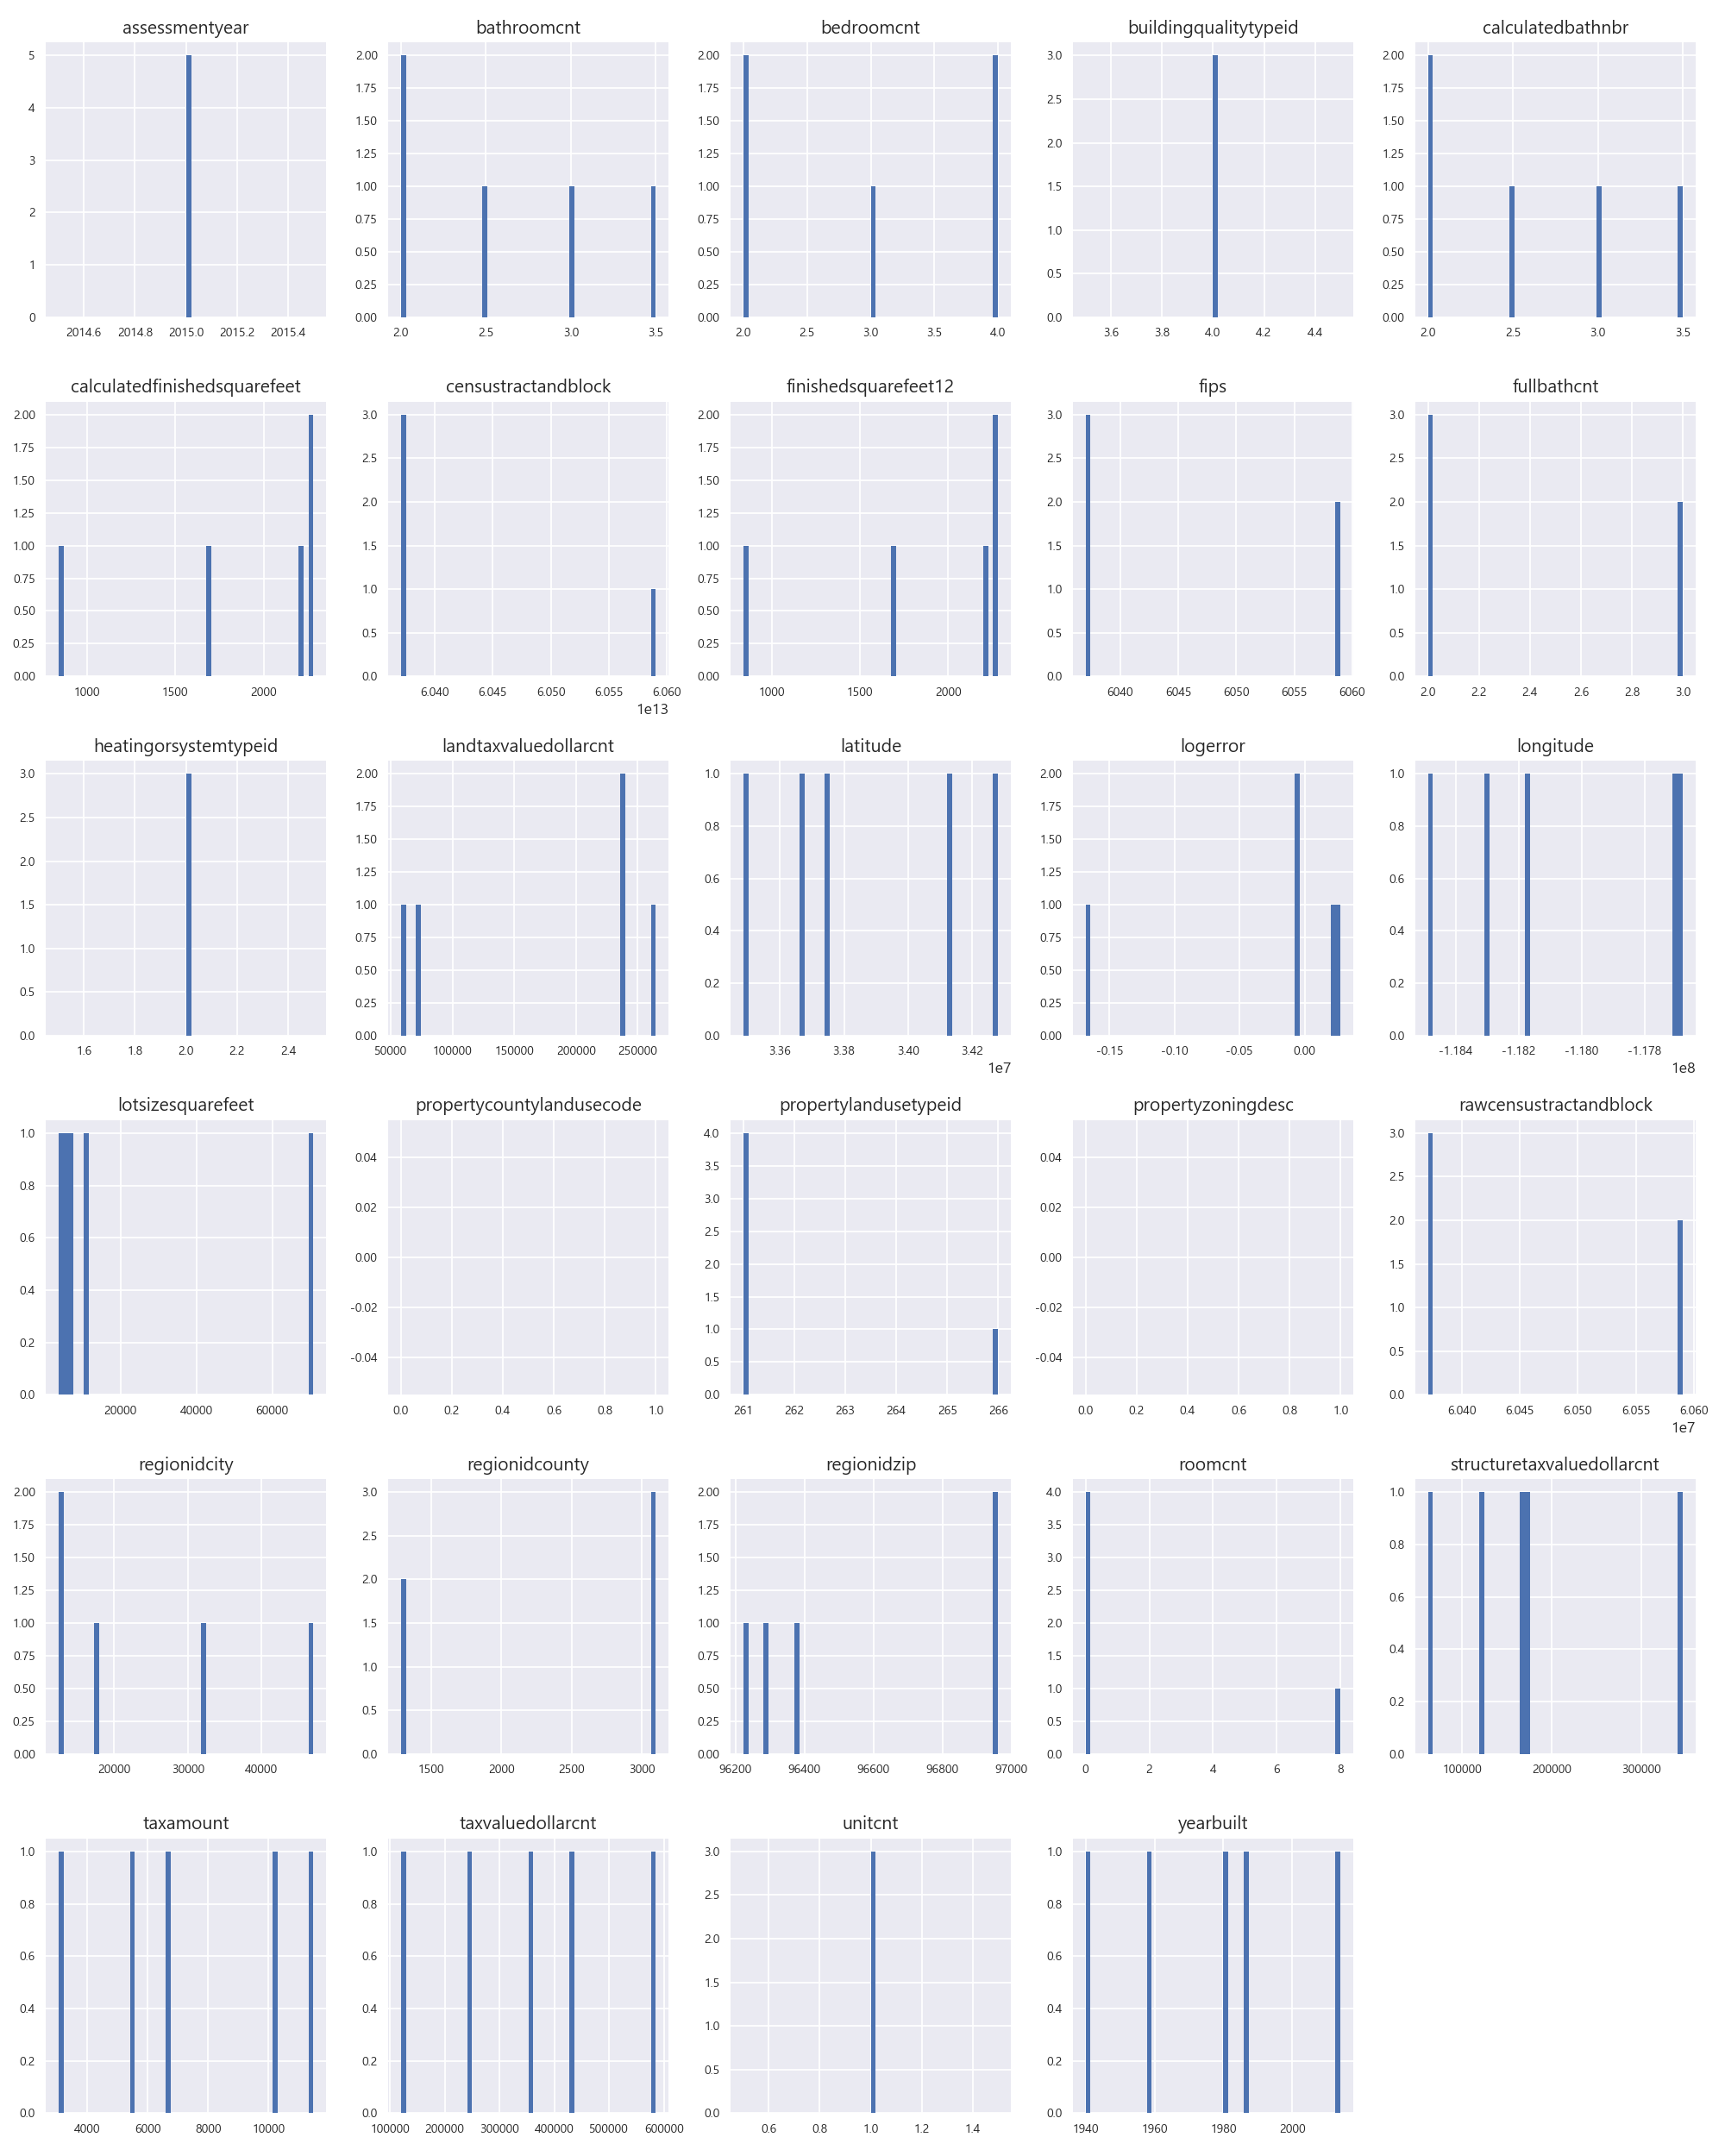

In [110]:
quantitative.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.tight_layout()

Categorical data에 대한 distribution

In [152]:
merged_obj = onlydatamerged.select_dtypes(include=['object'])
merged_obj.head()

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
0,NaN,0100,LARS,NaN,NaN
1,NaN,1,NaN,NaN,NaN
2,NaN,0100,PSR6,NaN,NaN
3,NaN,010C,LAR3,NaN,NaN
4,NaN,122,NaN,NaN,NaN
